In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

In [2]:
rr = pd.read_csv(r"C:\Users\jdgoe\Downloads\Data Serious\Covid1.csv")
rr.head()

,Cause of Death,Year,Month,Vaccination status,Count of deaths,Person-years,"Age-standardised mortality rate / 100,000 person-years",Noted as Unreliable,Lower confidence limit,Upper confidence limit
0,All causes,2021,April,Unvaccinated,"3,556","1,627,374",2087.2,NaN,2009.1,2165.4
1,All causes,2021,April,"First dose, less than 21 days ago",428,"225,906",1851.2,NaN,1605.1,2097.3
2,All causes,2021,April,"First dose, at least 21 days ago","16,237","1,271,496",1594.8,NaN,1567.0,1622.6
3,All causes,2021,April,"Second dose, less than 21 days ago","5,431","402,753",470.9,NaN,454.5,487.2
4,All causes,2021,April,"Second dose, between 21 days and 6 months ago","5,884","218,219",709.1,NaN,674.4,743.8


In [3]:
rr.loc[162, 'Month'] = 'October'
rr.loc[163, 'Month'] = 'October'
rr['Year'] = rr['Year'].astype(str)
rr['Age-standardised mortality rate / 100,000 person-years'] = pd.to_numeric(rr['Age-standardised mortality rate / 100,000 person-years'], errors='coerce')
rr = rr.rename(columns={'Age-standardised mortality rate / 100,000 person-years': 'rate'})
rtwo = rr[(rr['Year'] == '2022') & (rr['Cause of Death'] == 'All causes')]
rone = rr[(rr['Year'] == '2021') & (rr['Cause of Death'] == 'All causes')]
rt = rtwo
#fill numerical columns that are empty or have 'x' with '0'
rt = rt.replace(['nan', 'x'], np.nan)
rt = rt.replace('x', np.nan)
rt = rt.fillna('0') # fill nan and x with 0

# turn mortality rate and confidence limits into integers
rt['rate'] = pd.to_numeric(rt['rate'], errors='coerce')
rt['rate'] = rt['rate'].astype(int)
rt['Upper confidence limit'] = pd.to_numeric(rt['Upper confidence limit'], errors='coerce')
rt['Upper confidence limit'] = rt['Upper confidence limit'].astype(int)
rt['Lower confidence limit'] = pd.to_numeric(rt['Lower confidence limit'], errors='coerce')
rt['Lower confidence limit'] = rt['Lower confidence limit'].astype(int)
# Create Confidence interval
rt['SD'] = (rt['Upper confidence limit'] - rt['Lower confidence limit']) / 2

In [4]:
# Remove Vaccine status that has insignificant or empty data
rt = rt[rt['Vaccination status'] != 'First dose, less than 21 days ago']
rt = rt[rt['Vaccination status'] != 'Second dose, less than 21 days ago']
rt = rt[rt['Vaccination status'] != 'Third dose or booster, less than 21 days ago']

Text(-0.1, -0.17, 'Source: https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/deathsbyvaccinationstatusengland')

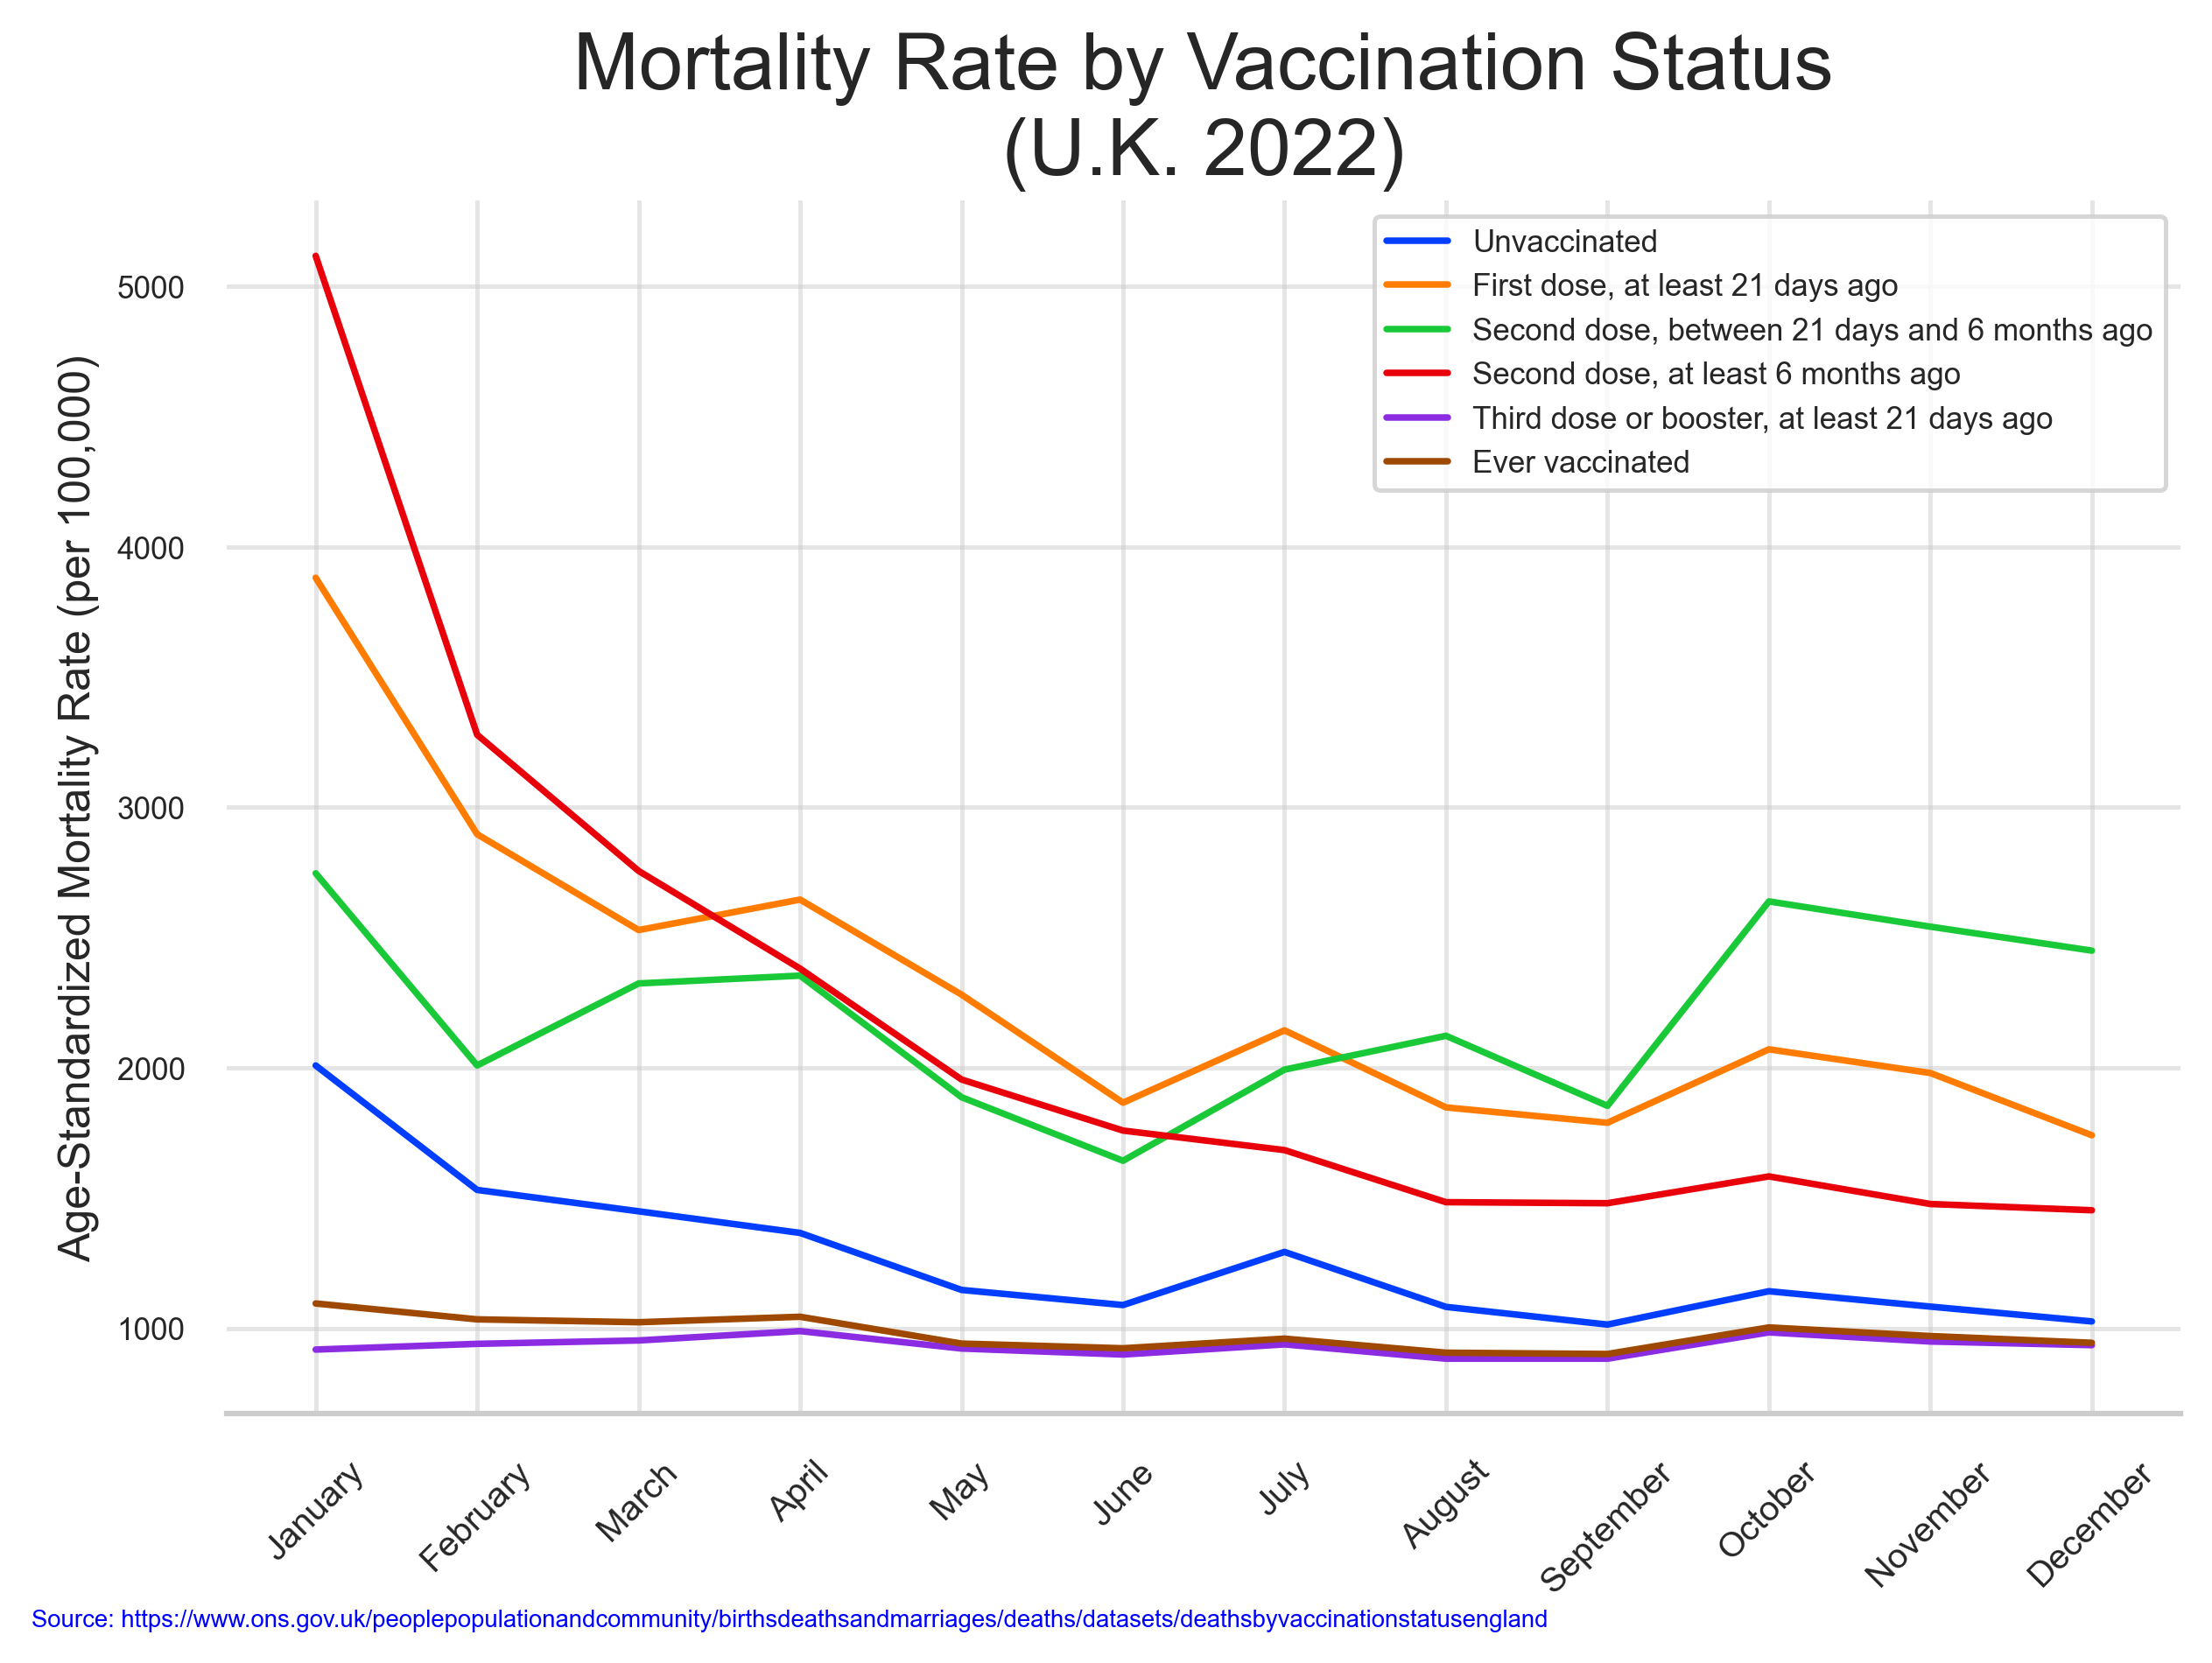

In [36]:
fig = plt.figure(figsize=(8,5))
plt.rcParams['figure.dpi'] = 360
sns.set(style='whitegrid')
sns.lineplot(x='Month', y='rate', hue='Vaccination status', data=rt, palette='bright')
sns.despine(top=True, right=True, left=True)
plt.ylabel('Age-Standardized Mortality Rate (per 100,000)', size=10)
plt.xlabel('')
plt.xticks(size=8, rotation=45)
plt.yticks(size=7)
plt.legend(loc='upper right', fontsize=7)
plt.grid(alpha=0.5)
plt.title('Mortality Rate by Vaccination Status\n(U.K. 2022)', size = 18)
plt.text(-.1, -0.17, 'Source: https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/deathsbyvaccinationstatusengland', fontsize=5.5, ha='left', va='center', color='blue', transform=plt.gca().transAxes)